# <font color =red> **Customer Clustering and Purchase Propensity**

**Name:** Hemachandar Nagarajan

**Email:** chandar13@gmail.com, hn305@drexel.edu

## <font color = red>**Clean and explore the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data=pd.read_csv('ecommerce_data.csv')

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,Email
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,Email
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,Direct
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,Direct
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,Paid Social


In [4]:
data.shape

(541909, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   channel      541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [6]:
#convert the datatypes if needed 

In [7]:
#Check for Missing Values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
channel             0
dtype: int64

In [8]:
data_new = data.dropna(how='any', subset=['CustomerID'])

In [9]:
data_new.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
channel        0
dtype: int64

<font color =red> **There are many missing values in customer ID butThe main focus here is customer clusters and their propensity prediction. And this is not about forecast the sales collected by the ecommerce compnay. So I have removed the customerID columns Which ultimately removes the empty Decriptions as well.** 

In [10]:
#InvoiceNo Column
data_new.InvoiceNo.nunique()

22190

One invoice number refers to one transaction/order which can have multiple items(StockCode) with multiple quantities in a unique date with a unique customer. Cancelled ones are starting with C.  

In [11]:
#StockCode Column
data.StockCode.nunique()

4070

Special code assigned to each unique product.

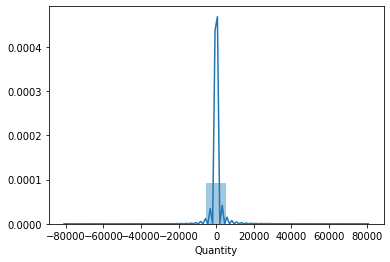

In [12]:
#Quantity column
sns.distplot(data_new['Quantity'], bins =15)

<font color =red>**There are negative values in `Quanity` column indicating the products are return/cancelled.**  

<font color =red>**So I am removing those negative quantities as the main aim of the problem at hand is to find out customer segements and their purchase prediction.( This will automatically remove the `InvoiceNo` values which start with 'C'.**  

In [13]:
data_new = data_new[data_new["Quantity"] > 0]
#Subsetting only debit invoices 

In [14]:
#CustomerID column
data_new.CustomerID.nunique()

4339

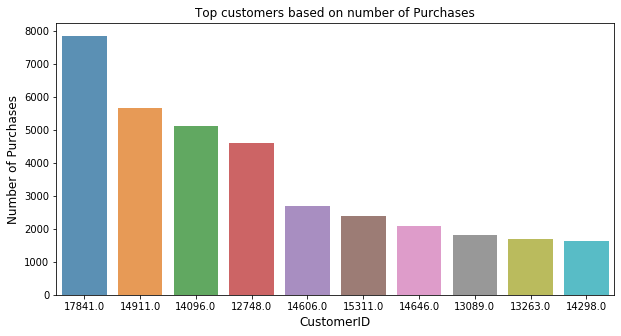

In [15]:
# Plotting a bar graph of top customers based on their number of purchases 

top_customers  = data_new['CustomerID'].value_counts()
top_customers = top_customers.iloc[:10,]
plt.figure(figsize=(10,5))
sns.barplot(top_customers.index, top_customers.values, order = top_customers.index, alpha=0.8)
plt.title('Top customers based on number of Purchases')
plt.ylabel('Number of Purchases', fontsize=12)
plt.xlabel('CustomerID', fontsize=12)
plt.show()

In [16]:
#Country column
data_new.Country.nunique()

37

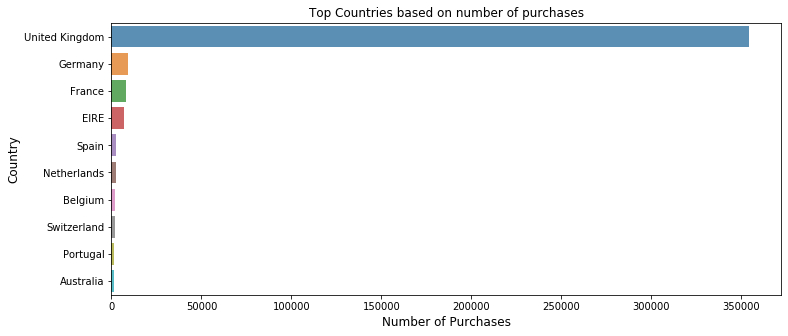

In [17]:
# Plotting a bar graph of top Countries based on number of purchases 
top_countries  = data_new['Country'].value_counts()
top_countries = top_countries.iloc[:10,]
plt.figure(figsize=(12,5))
sns.barplot(y = top_countries.index, x = top_countries.values, order = top_countries.index, alpha=0.8)
plt.title('Top Countries based on number of purchases')
plt.ylabel('Country', fontsize=12)
plt.xlabel('Number of Purchases', fontsize=12)
plt.show()

In [18]:
#Channel column
data_new.channel.nunique()

4

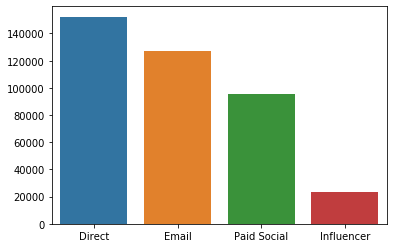

In [19]:
#Top Channels based on purchases
sns.barplot(x = data_new['channel'].value_counts().index, y = data_new['channel'].value_counts().values)

In [20]:
#InvoiceDate Column
data_new['InvoiceDate'] = pd.to_datetime(data_new['InvoiceDate'])
#Changing the format to Datetime format for analysis.

<font color =red>**You can have different number of purchases in a single invoice date.**

In [21]:
print("Minimumn purchase date present in the dataset: "+str(data_new['InvoiceDate'].min()))
print("Maximum purchase date present in the dataste: "+str(data_new['InvoiceDate'].max()))

Minimumn purchase date present in the dataset: 2010-12-01 08:26:00
Maximum purchase date present in the dataste: 2011-12-09 12:50:00


In [22]:
#I have created a revenue column using quantity sold and unit price
data_new['Sales'] = data_new['Quantity'] * data_new['UnitPrice']

In [23]:
#Revenue given by each customer
revenue = data_new.groupby(['CustomerID'])['Sales'].sum().reset_index()
revenue

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [24]:
#Customer distribution by country
customer_dist=data_new[['Country','CustomerID']].drop_duplicates()
customer_dist.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


In [25]:
#Customer distribution by Channels
customer_dist_c=data_new[['channel','CustomerID']].drop_duplicates()
customer_dist_c.groupby(['channel'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,channel,CustomerID
0,Direct,2832
1,Email,2653
3,Paid Social,2225
2,Influencer,828


### <font color =red>**Summary:**
- There are 4339 unique customers, 37 different country, 4 different channels and 4070 unique products purchased.
- As mentioned above one invoice number can have one unique customer with multiple stock code(products) and multiple quantities.
- Most of the purchases are from UK region and through the Direct channel
- The negative quantities indicating cancelled/returned orders were removed as they make no sense in the cluster process as well as the purchase predictions. 
- There were 135080 missing entries from the CustomerID column which were removed as they cannot be useful for further analysis. 

## <font color =red>**Define customer clusters using data-driven methods and describe them to a biz-crowd**

### RFM Model

In [26]:
#The latest date is set as 2011-12-10 as the last InvoiceDate was 2011-12-09. 
#This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

In [27]:
#Create RFM Modelling scores for each customer
RFMScores = data_new.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                'InvoiceNo': lambda x: len(x), 'Sales': lambda x: x.sum()})

In [28]:
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

In [29]:
#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Sales': 'Monetary'}, inplace=True)

In [30]:
RFMScores.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


In [31]:
#Split the RFM scores into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [32]:
#Shows the quantile values of recency, frequency and monetary
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [33]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [34]:
#Add R, F, M segements to the datafram
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [35]:
#Creating a combined RFM group
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Creating a RFM score by adding the group value
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [36]:
#Assigning a cluster to each customer

Cluster = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Cluster)
RFMScores['Cluster'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze


In [37]:
#Checking on the topmost customers (Platinum cluster)
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
0,14646.0,1,2080,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,14911.0,1,5677,143825.06,1,1,1,111,3,Platinum
4,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
9,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum


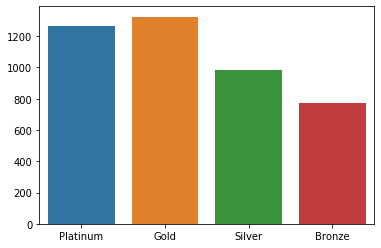

In [38]:
#Top Channels based on purchases
sns.barplot(x = RFMScores.reset_index()["Cluster"].value_counts().index, y = RFMScores.reset_index()["Cluster"].value_counts().values)

### <font color =red>**Summary:**

- Recency – How recently did the customer purchase?
(Recency value is the difference between the lastest date and the last purchase date of the customer)
- Frequency – How often do they purchase?
(The number of time the customer had made purchase in a given time frame)
- Monetary Value – How much do they spend?
(The total revneue gained from that particular customer)
- After calculating the values a cutoff based on their quartile distribution is set. 
- Based on this the customers are divied into 4 clusters (Platinum, Gold, Silver and Bronze) 
- Using these clusters customer retention and marketing stategies can be directed towards. 

## <font color =red>**Predict whether the customer will purchase again in the future 3 months**

As mentioned in the instructions I have used six months of behavioral data to predict customers’ first purchase date in the next three months. If there is no purchase, that will also predicted that too. 

Let’s assume our cut off date is Sep 9th ’11 and split the data:

In [39]:
#First 6months
tx_6m = data_new[(data_new.InvoiceDate < dt.datetime(2011,9,1)) & (data_new.InvoiceDate >= dt.datetime(2011,3,1))].reset_index(drop=True)
#
tx_next = data_new[(data_new.InvoiceDate >= dt.datetime(2011,9,1)) & (data_new.InvoiceDate <= dt.datetime(2011,12,1))].reset_index(drop=True)

In [40]:
tx_user = pd.DataFrame(tx_6m['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [41]:
#create a dataframe with customer id and first purchase date in tx_next
tx_next_first_purchase = tx_next.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_next_first_purchase.columns = ['CustomerID','MinPurchaseDate']

#create a dataframe with customer id and last purchase date in tx_6m
tx_last_purchase = tx_6m.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_last_purchase.columns = ['CustomerID','MaxPurchaseDate']

#merge two dataframes
tx_purchase_dates = pd.merge(tx_last_purchase,tx_next_first_purchase,on='CustomerID',how='left')

#calculate the time difference in days:
tx_purchase_dates['NextPurchaseDay'] = (tx_purchase_dates['MinPurchaseDate'] - tx_purchase_dates['MaxPurchaseDate']).dt.days

#merge with tx_user 
tx_user = pd.merge(tx_user, tx_purchase_dates[['CustomerID','NextPurchaseDay']],on='CustomerID',how='left')

#print tx_user
tx_user.head()

#fill NA values with 999
tx_user = tx_user.fillna(999)

In [42]:
tx_user

,CustomerID,NextPurchaseDay
0,14620.0,999.0
1,14740.0,999.0
2,13880.0,57.0
3,16462.0,111.0
4,17068.0,16.0
...,...,...
2808,16083.0,999.0
2809,13726.0,61.0
2810,15690.0,999.0
2811,17777.0,60.0


In [43]:
RFM_df = RFMScores.reset_index()

In [44]:
tx_user = pd.merge(tx_user,RFM_df,on='CustomerID',how='left')

In [45]:
tx_user

,CustomerID,NextPurchaseDay,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
0,14620.0,999.0,205,26,412.78,4,3,3,433,10,Silver
1,14740.0,999.0,197,89,1448.21,4,2,2,422,8,Gold
2,13880.0,57.0,21,165,3219.77,2,1,1,211,4,Platinum
3,16462.0,111.0,73,3,136.00,3,4,4,344,11,Bronze
4,17068.0,16.0,12,296,4552.14,1,1,1,111,3,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
2808,16083.0,999.0,100,31,1317.62,3,3,2,332,8,Gold
2809,13726.0,61.0,38,42,1079.66,2,2,2,222,6,Gold
2810,15690.0,999.0,4,19,239.76,1,3,4,134,8,Gold
2811,17777.0,60.0,24,194,665.86,2,1,3,213,6,Gold


In [46]:
#create a dataframe with CustomerID and Invoice Date
tx_day_order = tx_6m[['CustomerID','InvoiceDate']]
#convert Invoice Datetime to day
tx_day_order['InvoiceDay'] = tx_6m['InvoiceDate'].dt.date
tx_day_order = tx_day_order.sort_values(['CustomerID','InvoiceDate'])
#drop duplicates
tx_day_order = tx_day_order.drop_duplicates(subset=['CustomerID','InvoiceDay'],keep='first')

D:\Ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
#shifting last 3 purchase dates
tx_day_order['PrevInvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(1)
tx_day_order['T2InvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(2)
tx_day_order['T3InvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(3)

In [48]:
tx_day_order.head(10)

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate
32113,12347.0,2011-04-07 10:43:00,2011-04-07,NaN,NaN,NaN
86612,12347.0,2011-06-09 13:01:00,2011-06-09,2011-04-07,NaN,NaN
133155,12347.0,2011-08-02 08:48:00,2011-08-02,2011-06-09,2011-04-07,NaN
30438,12348.0,2011-04-05 10:47:00,2011-04-05,NaN,NaN,NaN
873,12352.0,2011-03-01 14:57:00,2011-03-01,NaN,NaN,NaN
13442,12352.0,2011-03-17 16:00:00,2011-03-17,2011-03-01,NaN,NaN
18214,12352.0,2011-03-22 16:08:00,2011-03-22,2011-03-17,2011-03-01,NaN
68842,12353.0,2011-05-19 17:47:00,2011-05-19,NaN,NaN,NaN
45779,12354.0,2011-04-21 13:11:00,2011-04-21,NaN,NaN,NaN
57056,12355.0,2011-05-09 13:49:00,2011-05-09,NaN,NaN,NaN


In [49]:
tx_day_order['DayDiff'] = (tx_day_order['InvoiceDay'] - tx_day_order['PrevInvoiceDate']).dt.days
tx_day_order['DayDiff2'] = (tx_day_order['InvoiceDay'] - tx_day_order['T2InvoiceDate']).dt.days
tx_day_order['DayDiff3'] = (tx_day_order['InvoiceDay'] - tx_day_order['T3InvoiceDate']).dt.days

In [50]:
tx_day_order

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3
32113,12347.0,2011-04-07 10:43:00,2011-04-07,NaN,NaN,NaN,NaN,NaN,NaN
86612,12347.0,2011-06-09 13:01:00,2011-06-09,2011-04-07,NaN,NaN,63.0,NaN,NaN
133155,12347.0,2011-08-02 08:48:00,2011-08-02,2011-06-09,2011-04-07,NaN,54.0,117.0,NaN
30438,12348.0,2011-04-05 10:47:00,2011-04-05,NaN,NaN,NaN,NaN,NaN,NaN
873,12352.0,2011-03-01 14:57:00,2011-03-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
71998,18283.0,2011-05-23 11:33:00,2011-05-23,2011-04-21,NaN,NaN,32.0,NaN,NaN
90594,18283.0,2011-06-14 11:41:00,2011-06-14,2011-05-23,2011-04-21,NaN,22.0,54.0,NaN
100401,18283.0,2011-06-23 19:20:00,2011-06-23,2011-06-14,2011-05-23,2011-04-21,9.0,31.0,63.0
116219,18283.0,2011-07-14 13:00:00,2011-07-14,2011-06-23,2011-06-14,2011-05-23,21.0,30.0,52.0


In [51]:
tx_day_diff = tx_day_order.groupby('CustomerID').agg({'DayDiff': ['mean','std']}).reset_index()
tx_day_diff.columns = ['CustomerID', 'DayDiffMean','DayDiffStd']

In [52]:
tx_day_order_last = tx_day_order.drop_duplicates(subset=['CustomerID'],keep='last')

The following features have been selected
- RFM scores & clusters
- Days between the last three purchases
- Mean & standard deviation of the difference between purchases in days
- After adding these features, we need to deal with the categorical features by applying get_dummies method.

In [53]:
tx_day_order_last = tx_day_order_last.dropna()
tx_day_order_last = pd.merge(tx_day_order_last, tx_day_diff, on='CustomerID')
tx_user = pd.merge(tx_user, tx_day_order_last[['CustomerID','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='CustomerID')
#create tx_class as a copy of tx_user before applying get_dummies
tx_class = tx_user.copy()
tx_class = pd.get_dummies(tx_class)

I have selected three classes:
0–20: Customers that will purchase in 0–20 days — Class name: 2
21–49: Customers that will purchase in 21–49 days — Class name: 1
≥ 50: Customers that will purchase in more than 50 days — Class name: 0

In [54]:
tx_class['NextPurchaseDayRange'] = 2
tx_class.loc[tx_class.NextPurchaseDay>20,'NextPurchaseDayRange'] = 1
tx_class.loc[tx_class.NextPurchaseDay>50,'NextPurchaseDayRange'] = 0

In [55]:
#import machine learning related libraries
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb

In [56]:
#train & test split
tx_class = tx_class.drop('NextPurchaseDay',axis=1)
X, y = tx_class.drop('NextPurchaseDayRange',axis=1), tx_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

#measure the accuracy 
for name,model in models:
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)
    

D:\Ananconda\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Ananconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Ananconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max

LR [0.47685185 0.47685185]
NB [0.49537037 0.43055556]
RF [0.51851852 0.48611111]
Dtree [0.5        0.48148148]


D:\Ananconda\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Ananconda\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB [0.46759259 0.49537037]
KNN [0.51851852 0.48148148]


Random Forest gave the best reult with 51% accuracy.

### XG Boost

In [57]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.48


In [61]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(), 
param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

D:\Ananconda\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 3, 'min_child_weight': 1}, 0.5070034750066827)

Even after parameter tuning there is not a big improvement in XGB

### Random Forest

In [62]:
RF_model = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
       .format(RF_model.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
       .format(RF_model.score(X_test[X_train.columns], y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.51


In [64]:
from sklearn.model_selection import GridSearchCV
param_grid2 = { 'criterion': ['entropy', 'gini'],'max_features': ['auto', 'sqrt','log2', None]}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = param_grid2, scoring='accuracy',cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'criterion': 'entropy', 'max_features': 'sqrt'}, 0.5300187115744454)

There is a slight improvement in the RF model after tuning the parameters